In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style = 'darkgrid')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# --- Install gdown if not already installed ---
!pip install gdown --quiet

# --- Import libraries ---
import gdown
import pandas as pd

# --- Step 1: Set your Google Drive file IDs ---
file1_id = "1uxDPr4QQdhCynW9p_jQ5pXjASSF0WS3_"  # forestfire
#file2_id = "1aMuKcA6OHlUfL7UmDzJMrUImADVdJXTt"  # algerian

# --- Step 2: Construct Google Drive download URLs ---
url1 = f"https://drive.google.com/uc?id={file1_id}"
#url2 = f"https://drive.google.com/uc?id={file2_id}"

# --- Step 3: Download the files using gdown ---
gdown.download(url1, "forestfire.csv", quiet=False)
#gdown.download(url2, "algerian.csv", quiet=False)

# --- Step 4: Load CSVs into Pandas ---
forestfire = pd.read_csv('forestfire.csv')
#algerian = pd.read_csv('algerian.csv')

# --- Step 5: Preview the data ---
print("First file preview (forestfire):")
print(forestfire.head(), "\n")

#print("Second file preview (algerian):")
#print(algerian.head())


Downloading...
From: https://drive.google.com/uc?id=1uxDPr4QQdhCynW9p_jQ5pXjASSF0WS3_
To: /content/forestfire.csv
100%|██████████| 26.0k/26.0k [00:00<00:00, 30.2MB/s]

First file preview (forestfire):
   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0 



https://drive.google.com/file/d/1uxDPr4QQdhCynW9p_jQ5pXjASSF0WS3_/view?usp=drive_link, https://drive.google.com/file/d/1aMuKcA6OHlUfL7UmDzJMrUImADVdJXTt/view?usp=drive_link

In [3]:
ff = forestfire.copy()

In [4]:
ff.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
ff.tail()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [6]:
#aff = algerian.copy()

In [7]:
#aff1 = algerian.copy()

In [8]:
#aff2 = algerian.copy()

In [9]:
# Promote row 0 to be header
#aff.columns = aff1.iloc[0]
#aff = aff1.drop(0).reset_index(drop=True)

#aff.head()


In [10]:
# Promote row 0 to be header
#aff1.columns = aff1.iloc[0]
#aff1 = aff1.drop(0).reset_index(drop=True)

#aff1.head()


In [11]:
#aff.head()

In [12]:
#aff1.tail()

All column names

In [13]:
print(ff. columns)
#print(aff. columns)

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')


Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types

In [14]:
ff.info()
#aff1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


Count rows and coulums

In [15]:
row1 = len(ff.axes[0])

column1 = len(ff.axes[1])
print("Forest fires Dataset:")
print("Number of Rows: ", row1)
print("Number of Columns: ", column1)

#row2 = len(aff.axes[0])

#column2 = len(aff.axes[1])
#print("Algeian Forest fires Dataset:")
#print("Number of Rows: ", row2)
#print("Number of Columns: ", column2)

Forest fires Dataset:
Number of Rows:  517
Number of Columns:  13


Total cells in the dataset

In [16]:
print("Forest fires Dataset: ", row1*column1)
#print("Algerian Forest fires Dataset: ", row2*column2)

Forest fires Dataset:  6721


Identifying missing values in Datasets

In [17]:
ff.isnull().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


In [18]:
#aff1.isnull().sum()

Fixing null values:

In [19]:
# Check duplicate rows for FF
duplicates_count = ff.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

Number of duplicate rows: 4


In [20]:
# Remove duplicate rows and reset index for FF
ff = ff.drop_duplicates().reset_index(drop=True)

print("Duplicates removed. New shape:", ff.shape)

Duplicates removed. New shape: (513, 13)


In [21]:
# categorical and numerical identifying for FF
# Identify categorical columns (dtype = object)
categorical_cols = ff.select_dtypes(include=['object']).columns.tolist()

# Identify numerical columns
numerical_cols = ff.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)


Categorical columns: ['month', 'day']
Numerical columns: ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


In [22]:
# Manual mapping for months
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
  }

# Custom mapping for days starting from Saturday
day_mapping_custom = {'sat': 1, 'sun': 2, 'mon': 3, 'tue': 4, 'wed': 5, 'thu': 6, 'fri': 7}

# Apply the mappings
ff['month'] = ff['month'].map(month_mapping)
ff['day'] = ff['day'].map(day_mapping_custom)

# Verify changes
print(ff[['month', 'day']].head())


   month  day
0      3    7
1     10    4
2     10    1
3      3    7
4      3    2


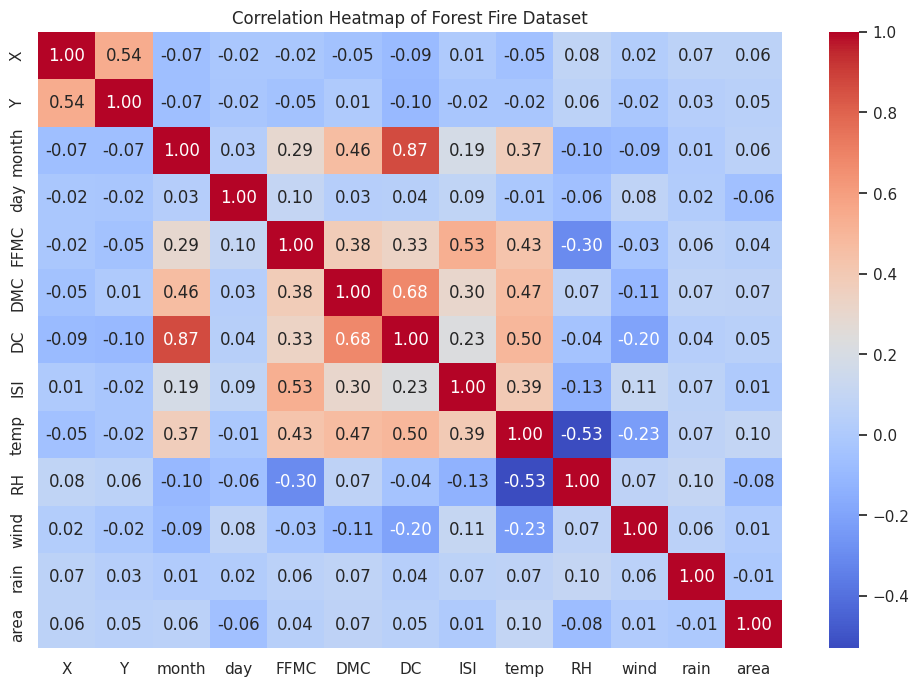

In [23]:
# Set the figure size
plt.figure(figsize=(12,8))

# Compute correlation matrix
corr = ff.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap of Forest Fire Dataset")
plt.show()

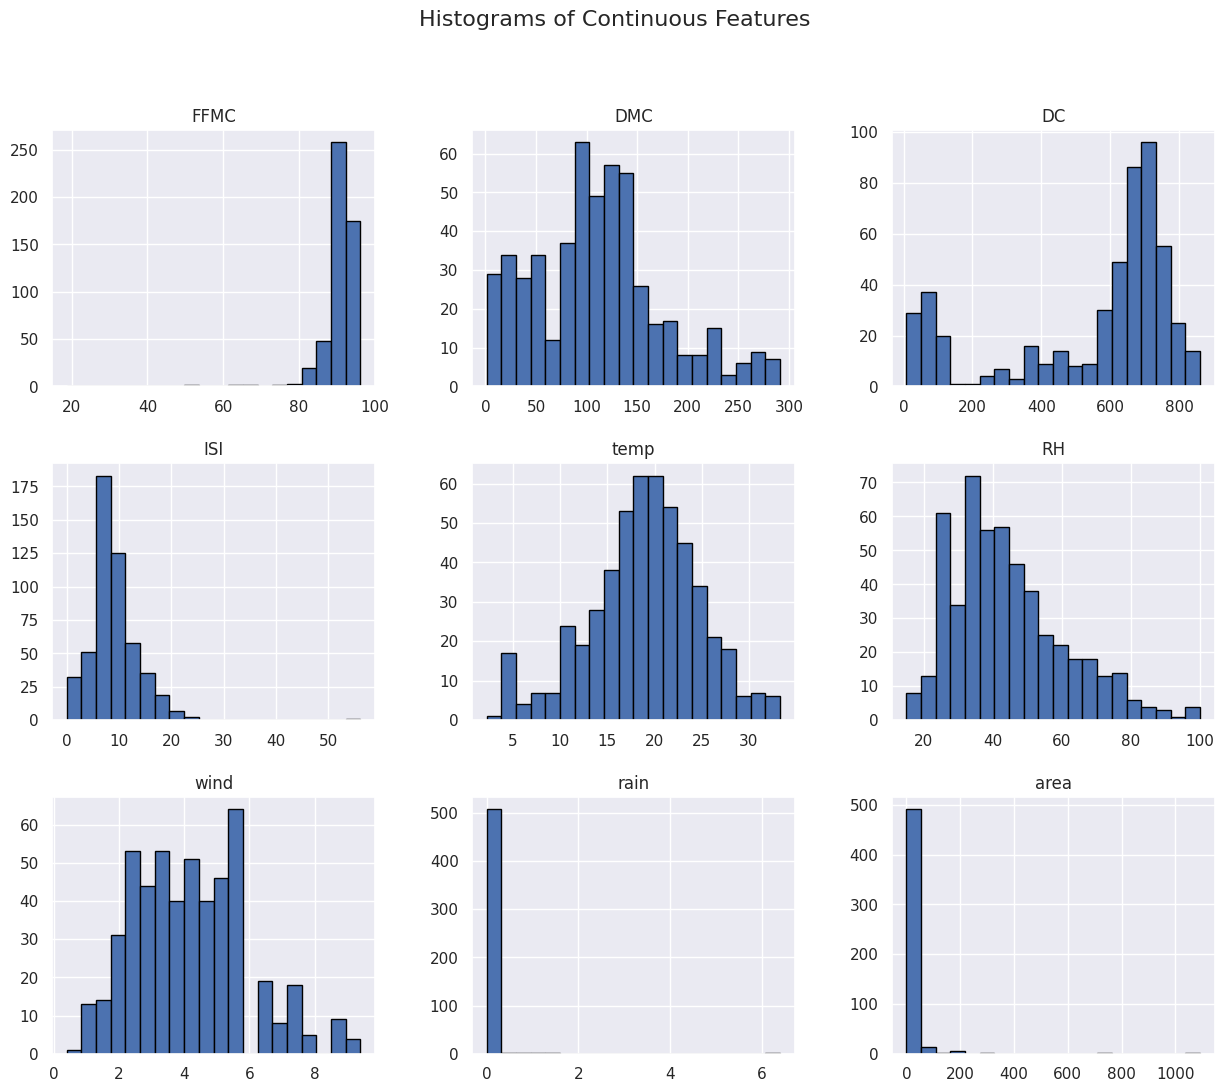

In [24]:
continuous_cols = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

# Plot histograms
ff[continuous_cols].hist(bins=20, figsize=(15,12), edgecolor='black')
plt.suptitle("Histograms of Continuous Features", fontsize=16)
plt.show()

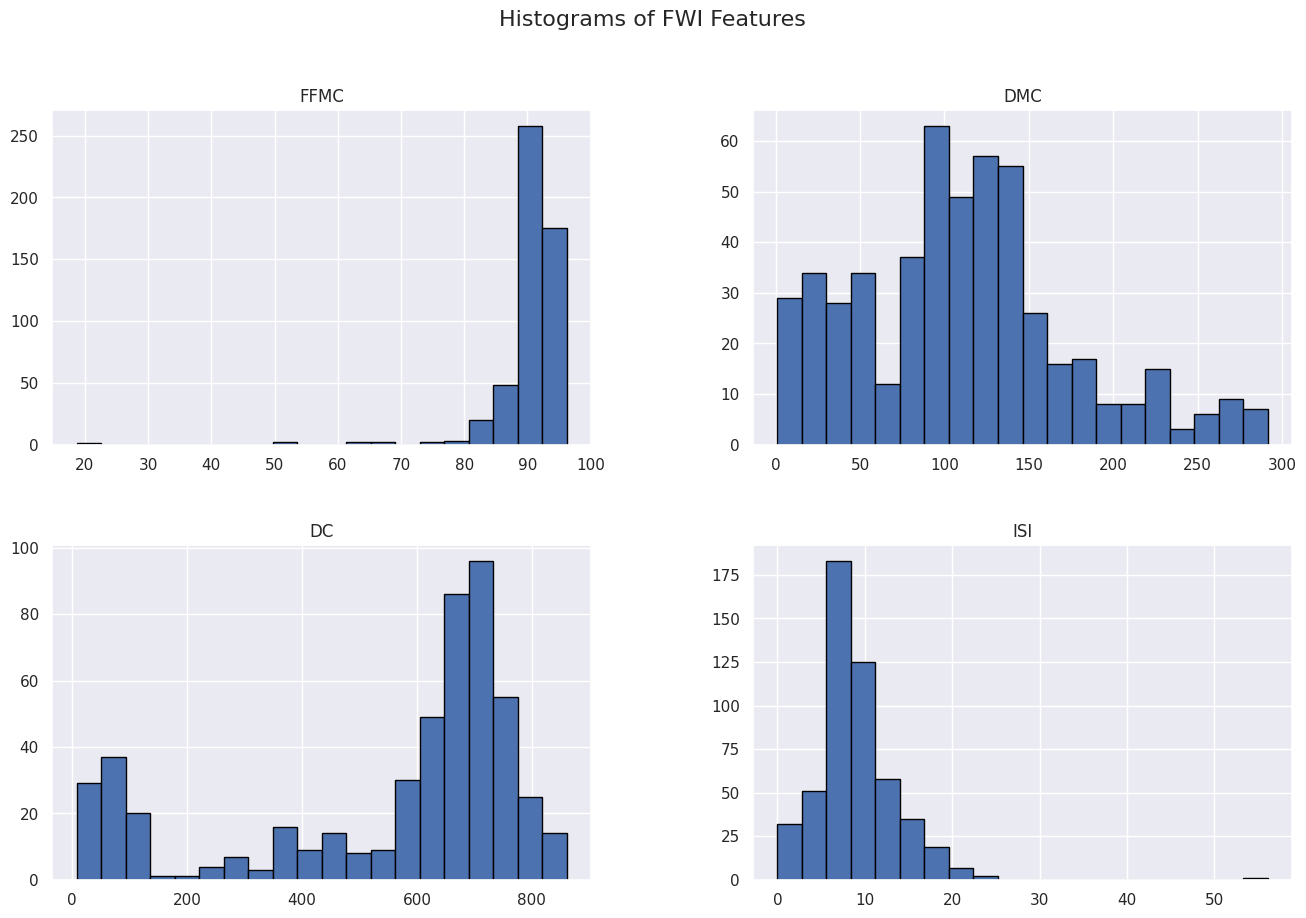

In [25]:
fwi_cols = ['FFMC', 'DMC', 'DC', 'ISI']

# Plot histograms
ff[fwi_cols].hist(bins=20, figsize=(16,10), edgecolor='black')
plt.suptitle("Histograms of FWI Features", fontsize=16)
plt.show()

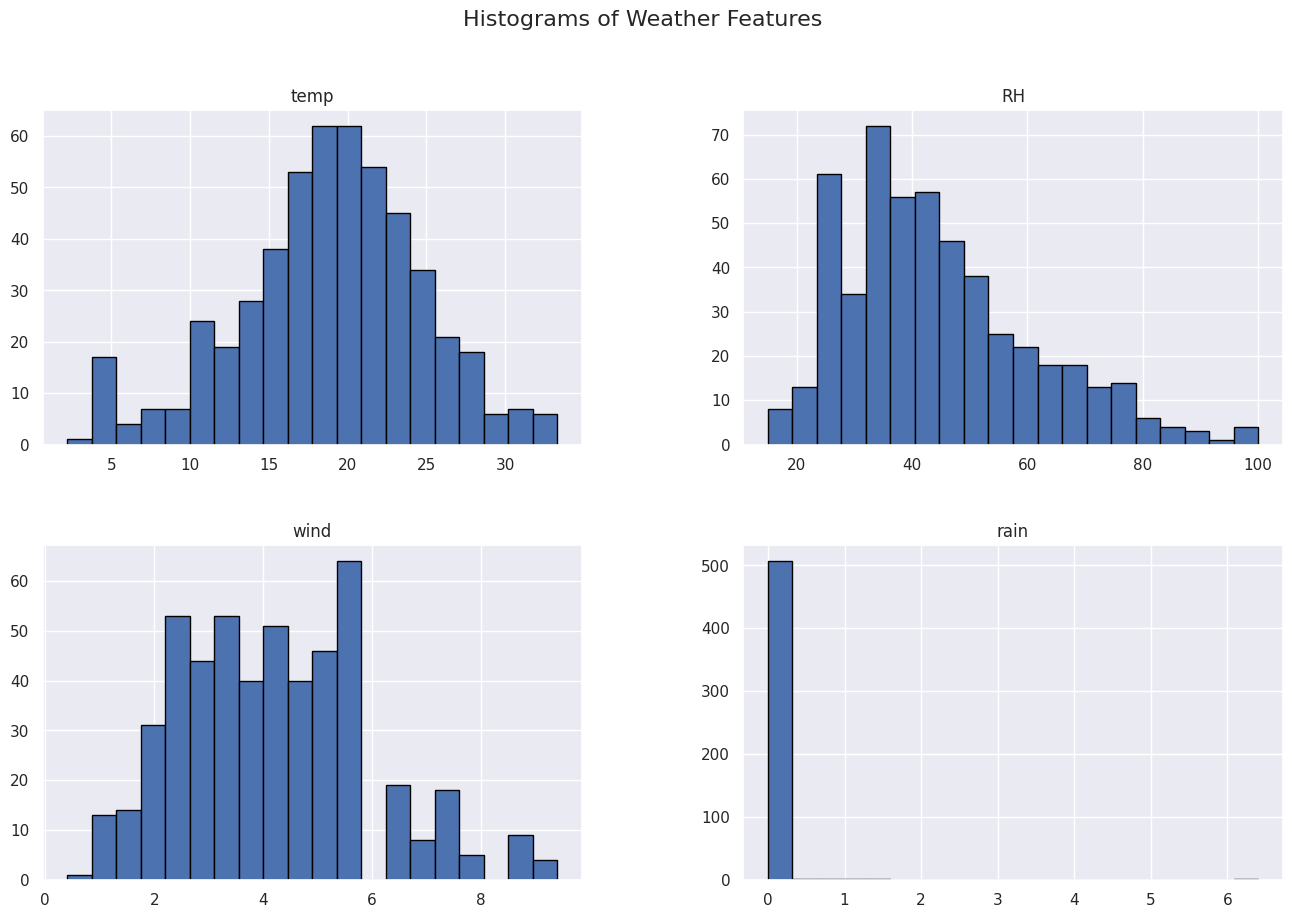

In [26]:
weather_cols = ['temp', 'RH', 'wind', 'rain']

# Plot histograms
ff[weather_cols].hist(bins=20, figsize=(16,10), edgecolor='black')
plt.suptitle("Histograms of Weather Features", fontsize=16)
plt.show()

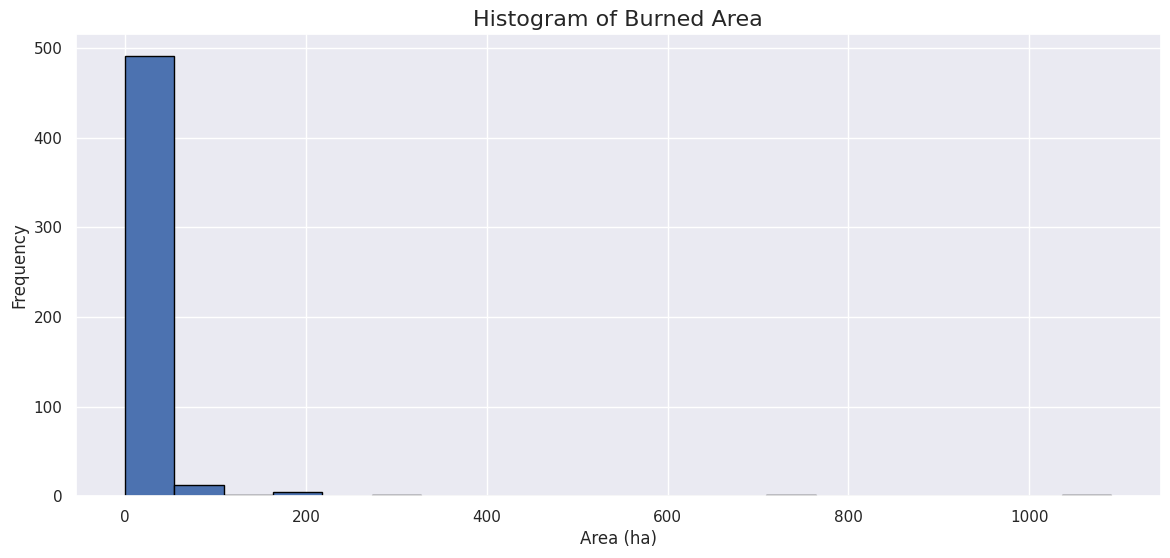

In [27]:
# Target variable
plt.figure(figsize=(14,6))
plt.hist(ff['area'], bins=20, edgecolor='black')
plt.title("Histogram of Burned Area", fontsize=16)
plt.xlabel("Area (ha)")
plt.ylabel("Frequency")
plt.show()

In [28]:
ff['log_area'] = np.log1p(ff['area'])  # log(area + 1) to handle zeros

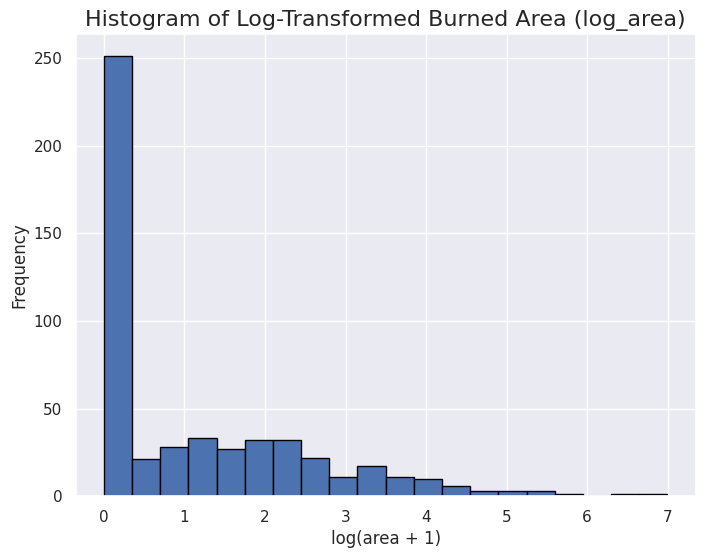

In [29]:
plt.figure(figsize=(8,6))
plt.hist(ff['log_area'], bins=20, edgecolor='black')
plt.title("Histogram of Log-Transformed Burned Area (log_area)", fontsize=16)
plt.xlabel("log(area + 1)")
plt.ylabel("Frequency")
plt.show()

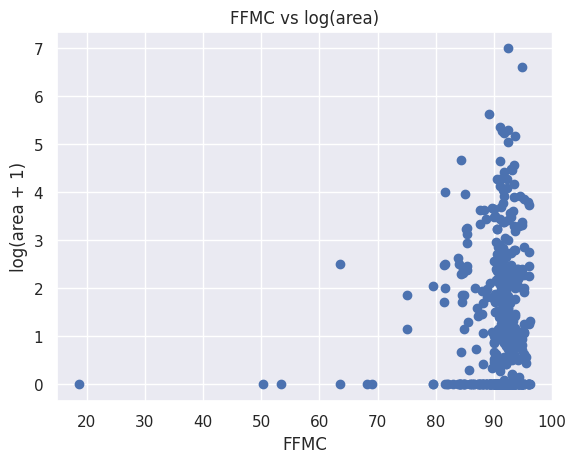

In [30]:
plt.scatter(ff['FFMC'], ff['log_area'])
plt.xlabel("FFMC")
plt.ylabel("log(area + 1)")
plt.title("FFMC vs log(area)")
plt.show()

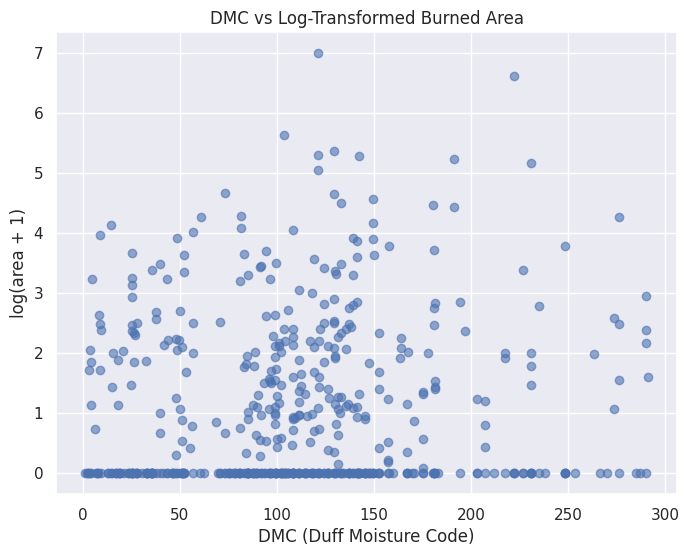

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(ff['DMC'], ff['log_area'], alpha=0.6)
plt.xlabel("DMC (Duff Moisture Code)")
plt.ylabel("log(area + 1)")
plt.title("DMC vs Log-Transformed Burned Area")
plt.show()

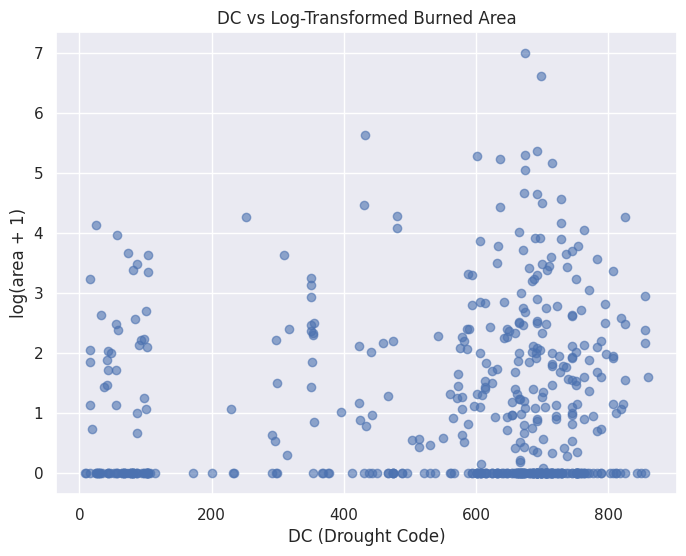

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(ff['DC'], ff['log_area'], alpha=0.6)
plt.xlabel("DC (Drought Code)")
plt.ylabel("log(area + 1)")
plt.title("DC vs Log-Transformed Burned Area")
plt.show()

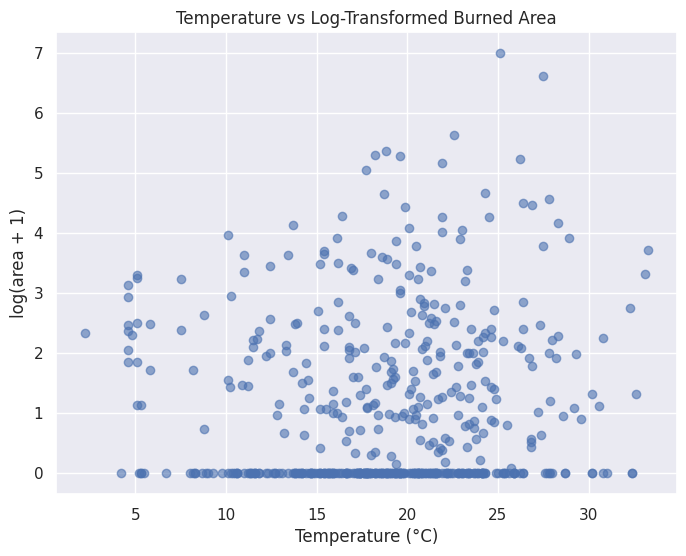

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(ff['temp'], ff['log_area'], alpha=0.6)
plt.xlabel("Temperature (°C)")
plt.ylabel("log(area + 1)")
plt.title("Temperature vs Log-Transformed Burned Area")
plt.show()

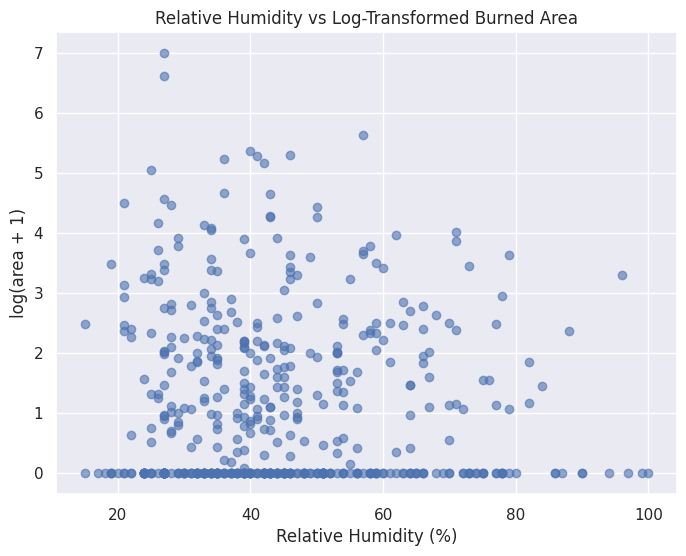

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(ff['RH'], ff['log_area'], alpha=0.6)
plt.xlabel("Relative Humidity (%)")
plt.ylabel("log(area + 1)")
plt.title("Relative Humidity vs Log-Transformed Burned Area")
plt.show()

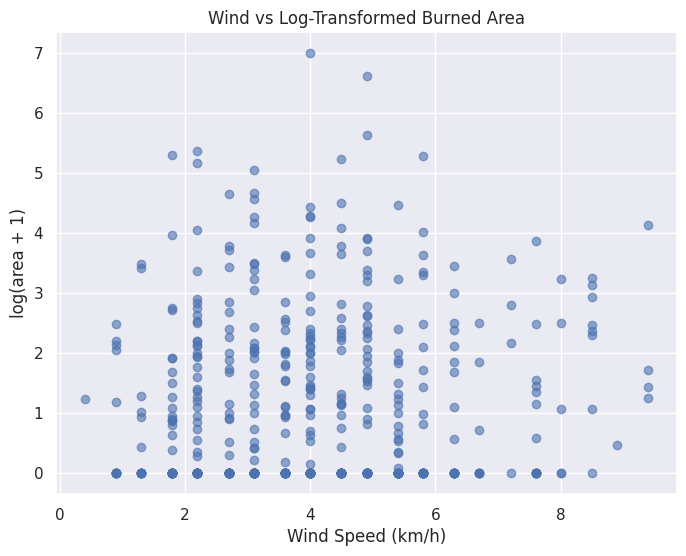

In [35]:
plt.figure(figsize=(8,6))
plt.scatter(ff['wind'], ff['log_area'], alpha=0.6)
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("log(area + 1)")
plt.title("Wind vs Log-Transformed Burned Area")
plt.show()

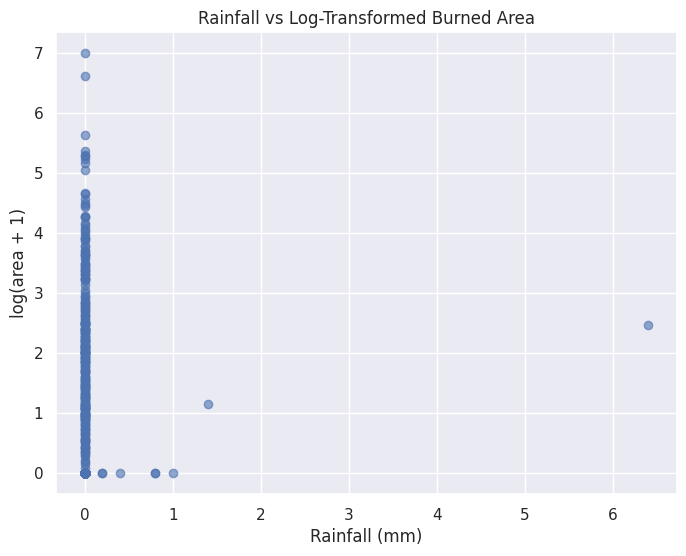

In [36]:
plt.figure(figsize=(8,6))
plt.scatter(ff['rain'], ff['log_area'], alpha=0.6)
plt.xlabel("Rainfall (mm)")
plt.ylabel("log(area + 1)")
plt.title("Rainfall vs Log-Transformed Burned Area")
plt.show()

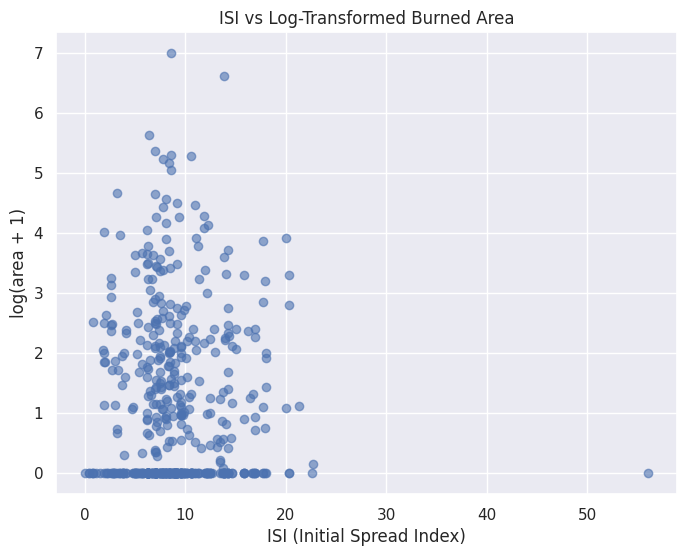

In [37]:
plt.figure(figsize=(8,6))
plt.scatter(ff['ISI'], ff['log_area'], alpha=0.6)
plt.xlabel("ISI (Initial Spread Index)")
plt.ylabel("log(area + 1)")
plt.title("ISI vs Log-Transformed Burned Area")
plt.show()

/tmp/ipython-input-4003965410.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ff, x='month', y='area', estimator='mean', ci=None)


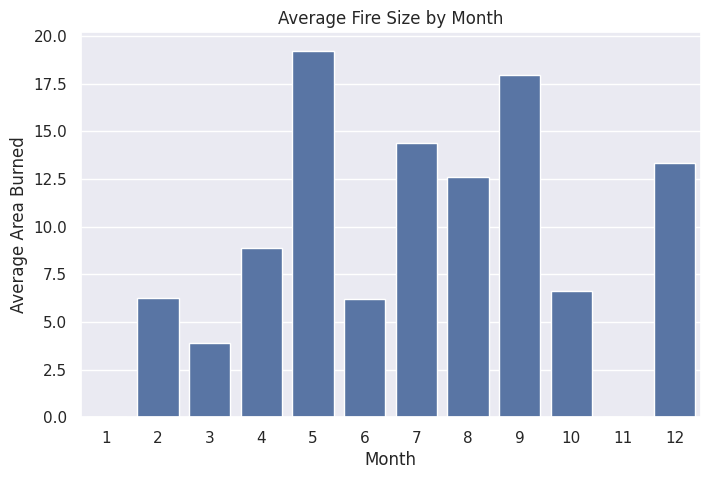

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(data=ff, x='month', y='area', estimator='mean', ci=None)
plt.title('Average Fire Size by Month')
plt.xlabel('Month')
plt.ylabel('Average Area Burned')
plt.show()

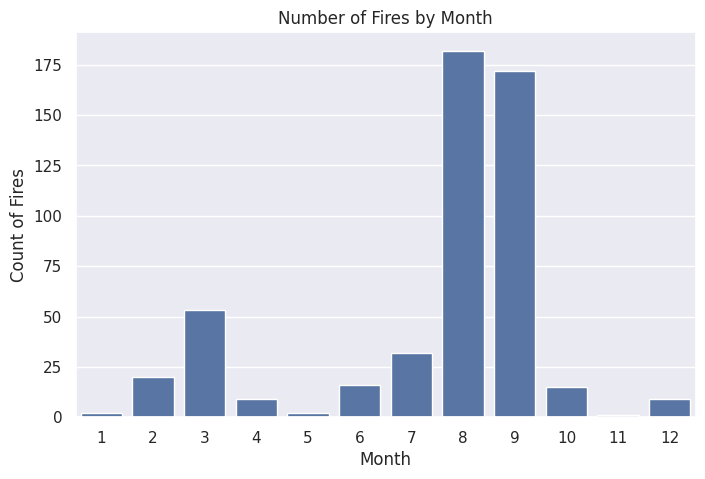

In [39]:
plt.figure(figsize=(8,5))
sns.countplot(data=ff, x='month')
plt.title('Number of Fires by Month')
plt.xlabel('Month')
plt.ylabel('Count of Fires')
plt.show()

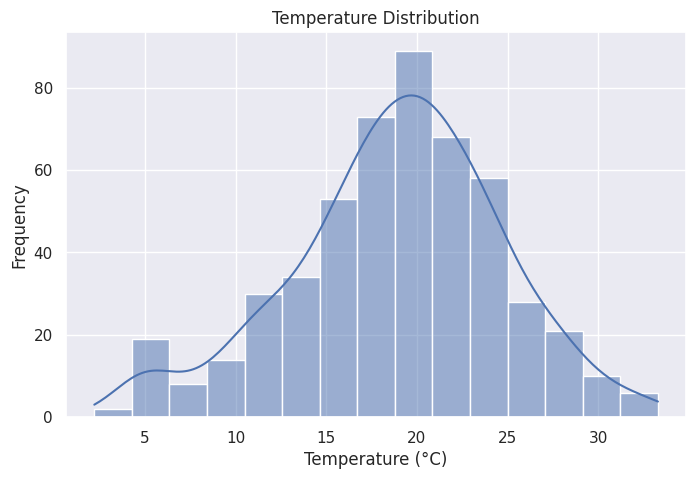

In [40]:
plt.figure(figsize=(8,5))
sns.histplot(ff['temp'], bins=15, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

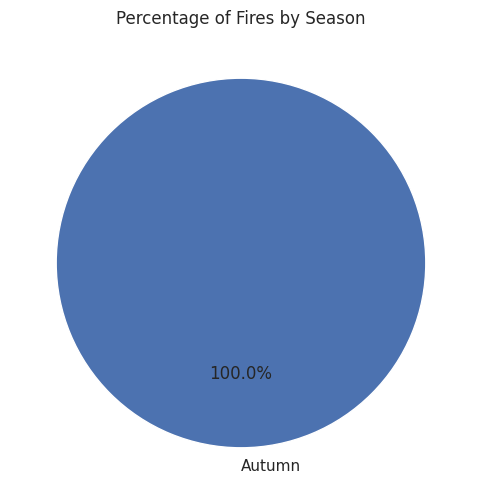

In [41]:
# Define seasons
def get_season(month):
    if month in ['dec', 'jan', 'feb']:
        return 'Winter'
    elif month in ['mar', 'apr', 'may']:
        return 'Spring'
    elif month in ['jun', 'jul', 'aug']:
        return 'Summer'
    else:
        return 'Autumn'

ff['season'] = ff['month'].apply(get_season)

season_counts = ff['season'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Fires by Season')
plt.show()

In [42]:
# Select features and target
features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']
X = ff[features]
y = ff['log_area']

# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"R^2 Score: {r2:.3f}")

# Optional: check coefficients
coef_df = dict(zip(features, model.coef_))
print("Feature Coefficients:")
for feature, coef in coef_df.items():
    print(f"{feature}: {coef:.3f}")

Mean Squared Error: 1.647
R^2 Score: 0.014
Feature Coefficients:
FFMC: 0.011
DMC: 0.001
DC: 0.000
ISI: -0.030
temp: 0.021
RH: -0.000
wind: 0.078


In [43]:
# Features and target (same as before)
features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']
X = ff[features]
y = ff['log_area']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict on test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate model
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - Mean Squared Error: {mse_tree:.3f}")
print(f"Decision Tree - R^2 Score: {r2_tree:.3f}")

Decision Tree - Mean Squared Error: 3.503
Decision Tree - R^2 Score: -1.097


In [44]:
# Create binary target: 1 if area > 0 else 0
ff['fire_occurred'] = (ff['area'] > 0).astype(int)

# Features and target
features = ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind']
X = ff[features]
y = ff['fire_occurred']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test set
y_pred_class = log_model.predict(X_test)

# Accuracy score
acc = accuracy_score(y_test, y_pred_class)
print(f"Accuracy Score: {acc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
print(cm)


Accuracy Score: 0.544
Confusion Matrix:
[[19 34]
 [13 37]]


In [45]:
from google.colab import files
uploaded = files.upload()

Saving Algerian_forest_fires_dataset.csv to Algerian_forest_fires_dataset.csv


In [46]:
aff = pd.read_csv(list(uploaded.keys())[0], header=0) # Read with header

aff = aff.dropna(how='all')

aff = pd.read_csv(list(uploaded.keys())[0], header=0, skiprows=[124]) # Assuming row 124 is the second region title row

aff = aff.dropna(how='all')

print(aff.info())
print(aff.head())

<class 'pandas.core.frame.DataFrame'>
Index: 245 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 28.7+ KB
None
  day month  year Temperature  RH  Ws Rain   FFMC  DMC    DC  ISI  BUI  FWI  \
0   1     6  2012          29  57  18     0  65.7  3.4   7.6  1.3  3.4  0.5   
1   2     6  2012          29  61  13  

In [47]:
for col in aff.columns:
    aff[col] = pd.to_numeric(aff[col], errors='coerce')

aff.dropna(inplace=True)

print(aff.head())
print(aff.info())

Empty DataFrame
Columns: [day, month, year, Temperature,  RH,  Ws, Rain , FFMC, DMC, DC, ISI, BUI, FWI, Classes  ]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          0 non-null      float64
 1   month        0 non-null      float64
 2   year         0 non-null      float64
 3   Temperature  0 non-null      float64
 4    RH          0 non-null      float64
 5    Ws          0 non-null      float64
 6   Rain         0 non-null      float64
 7   FFMC         0 non-null      float64
 8   DMC          0 non-null      float64
 9   DC           0 non-null      float64
 10  ISI          0 non-null      float64
 11  BUI          0 non-null      float64
 12  FWI          0 non-null      float64
 13  Classes      0 non-null      float64
dtypes: float64(14)
memory usage: 0.0 bytes
None


In [48]:
df_no_header = pd.read_csv(list(uploaded.keys())[0], header=None)

# Print the first few rows and info to identify header and region rows
print(df_no_header.head())
print(df_no_header.info())

    0      1     2            3    4    5      6     7    8    9    10   11  \
0  day  month  year  Temperature   RH   Ws  Rain   FFMC  DMC   DC  ISI  BUI   
1    1      6  2012           29   57   18      0  65.7  3.4  7.6  1.3  3.4   
2    2      6  2012           29   61   13    1.3  64.4  4.1  7.6    1  3.9   
3    3      6  2012           26   82   22   13.1  47.1  2.5  7.1  0.3  2.7   
4    4      6  2012           25   89   13    2.5  28.6  1.3  6.9    0  1.7   

    12           13  
0  FWI    Classes    
1  0.5  not fire     
2  0.4  not fire     
3  0.1  not fire     
4    0  not fire     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       247 non-null    object
 1   1       246 non-null    object
 2   2       246 non-null    object
 3   3       246 non-null    object
 4   4       246 non-null    object
 5   5       246 non-null    object


In [49]:
# Display more rows to find the region titles and confirm the header row
print(df_no_header.iloc[120:130])

                                0      1     2            3    4    5      6   \
120                             28      9  2012           32   47   14    0.7   
121                             29      9  2012           26   80   16    1.8   
122                             30      9  2012           25   78   14    1.4   
123                            NaN    NaN   NaN          NaN  NaN  NaN    NaN   
124  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
125                            day  month  year  Temperature   RH   Ws  Rain    
126                              1      6  2012           32   71   12    0.7   
127                              2      6  2012           30   73   13      4   
128                              3      6  2012           29   80   14      2   
129                              4      6  2012           30   64   14      0   

       7    8     9    10   11   12           13  
120  77.5  7.1   8.8  1.8  6.8  0.9  not fire     
121  4

In [50]:
aff1 = pd.read_csv(list(uploaded.keys())[0], header=0, skiprows=[125])

# Display the first few rows and info to confirm the correct data loading.
print(aff1.head())
print(aff1.info())

  day  month    year  Temperature    RH    Ws  Rain   FFMC  DMC    DC  ISI  \
0   1    6.0  2012.0         29.0  57.0  18.0    0.0  65.7  3.4   7.6  1.3   
1   2    6.0  2012.0         29.0  61.0  13.0    1.3  64.4  4.1   7.6  1.0   
2   3    6.0  2012.0         26.0  82.0  22.0   13.1  47.1  2.5   7.1  0.3   
3   4    6.0  2012.0         25.0  89.0  13.0    2.5  28.6  1.3   6.9  0.0   
4   5    6.0  2012.0         27.0  77.0  16.0    0.0  64.8  3.0  14.2  1.2   

   BUI  FWI    Classes    
0  3.4  0.5  not fire     
1  3.9  0.4  not fire     
2  2.7  0.1  not fire     
3  1.7    0  not fire     
4  3.9  0.5  not fire     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4    RH    

In [51]:
# Step 1: Check the column names
print(aff1.columns.tolist())

# Step 2: Remove leading/trailing spaces from all column names
aff1.columns = aff1.columns.str.strip()

# Step 3: Print the updated column names to verify the changes
print(aff1.columns.tolist())

['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ']
['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']


In [52]:
for col in aff1.columns:
    aff1[col] = pd.to_numeric(aff1[col], errors='coerce')

print(aff1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    float64
 1   month        244 non-null    float64
 2   year         244 non-null    float64
 3   Temperature  244 non-null    float64
 4   RH           244 non-null    float64
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      0 non-null      float64
dtypes: float64(14)
memory usage: 27.0 KB
None


In [53]:
# Display the number of missing values per column
print("Number of missing values per column before dropping NaNs:")
print(aff1.isnull().sum())

Number of missing values per column before dropping NaNs:
day              2
month            2
year             2
Temperature      2
RH               2
Ws               2
Rain             2
FFMC             2
DMC              2
DC               3
ISI              2
BUI              2
FWI              3
Classes        246
dtype: int64


In [54]:
# Get the shape before dropping NaNs
shape_before = aff1.shape
print(f"\nShape of the DataFrame before dropping NaNs: {shape_before}")


Shape of the DataFrame before dropping NaNs: (246, 14)


In [55]:
# Drop rows with any NaN values
aff1.dropna(inplace=True)

In [56]:
# Print the shape of the DataFrame after dropping NaNs
shape_after = aff1.shape
print(f"Shape of the DataFrame after dropping NaNs: {shape_after}")

Shape of the DataFrame after dropping NaNs: (0, 14)


In [57]:
# Print the number of rows removed
rows_removed = shape_before[0] - shape_after[0]
print(f"Number of rows removed due to NaNs: {rows_removed}")

Number of rows removed due to NaNs: 246


In [58]:
# Print the first few rows and the info of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
display(aff1.head())
print("\nInfo of the cleaned DataFrame:")
print(aff1.info())


First few rows of the cleaned DataFrame:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes



Info of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          0 non-null      float64
 1   month        0 non-null      float64
 2   year         0 non-null      float64
 3   Temperature  0 non-null      float64
 4   RH           0 non-null      float64
 5   Ws           0 non-null      float64
 6   Rain         0 non-null      float64
 7   FFMC         0 non-null      float64
 8   DMC          0 non-null      float64
 9   DC           0 non-null      float64
 10  ISI          0 non-null      float64
 11  BUI          0 non-null      float64
 12  FWI          0 non-null      float64
 13  Classes      0 non-null      float64
dtypes: float64(14)
memory usage: 0.0 bytes
None


In [59]:
# Re-load the data to a clean state before the failed NaN handling and mapping
aff1 = pd.read_csv(list(uploaded.keys())[0], header=0, skiprows=[125])
aff1.columns = aff1.columns.str.strip()

In [60]:
print("Unique values in 'Classes' column before mapping:")
print(aff1['Classes'].unique())

Unique values in 'Classes' column before mapping:
['not fire   ' 'fire   ' 'fire' 'fire ' 'not fire' 'not fire ' nan
 'not fire     ' 'not fire    ']


In [61]:
aff1['Classes'] = aff1['Classes'].astype(str).str.strip().map({'not fire': 0, 'fire': 1})


In [62]:
# Convert 'Classes' column to numeric, coercing errors to NaN
aff1['Classes'] = pd.to_numeric(aff1['Classes'], errors='coerce')

In [63]:
# Inspect unique values in the 'Classes' column after mapping and coercion
print("Unique values in 'Classes' column after mapping and coercion:")
print(aff1['Classes'].unique())

Unique values in 'Classes' column after mapping and coercion:
[ 0.  1. nan]


In [64]:
print("\nNumber of missing values in 'Classes' column after mapping:")
print(aff1['Classes'].isnull().sum())


Number of missing values in 'Classes' column after mapping:
3


In [65]:
# Convert all other columns to numeric, coercing errors to NaN
for col in aff1.columns:
    if col != 'Classes':
        aff1[col] = pd.to_numeric(aff1[col], errors='coerce')


In [66]:
print("\nNumber of missing values per column after re-processing:")
print(aff1.isnull().sum())


Number of missing values per column after re-processing:
day            2
month          2
year           2
Temperature    2
RH             2
Ws             2
Rain           2
FFMC           2
DMC            2
DC             3
ISI            2
BUI            2
FWI            3
Classes        3
dtype: int64


In [67]:
# Drop rows with any NaN values as originally planned
#shape_before = aff1.shape
aff1.dropna(inplace=True)
#shape_after = aff1.shape
#rows_removed = shape_before[0] - shape_after[0]


In [68]:
# Print the first few rows and the info of the cleaned DataFrame
print("\nFirst few rows of the cleaned DataFrame:")
display(aff1.head())
print("\nInfo of the cleaned DataFrame:")
print(aff1.info())


First few rows of the cleaned DataFrame:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0



Info of the cleaned DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    float64
 1   month        243 non-null    float64
 2   year         243 non-null    float64
 3   Temperature  243 non-null    float64
 4   RH           243 non-null    float64
 5   Ws           243 non-null    float64
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    float64
dtypes: float64(14)
memory usage: 28.5 KB
None


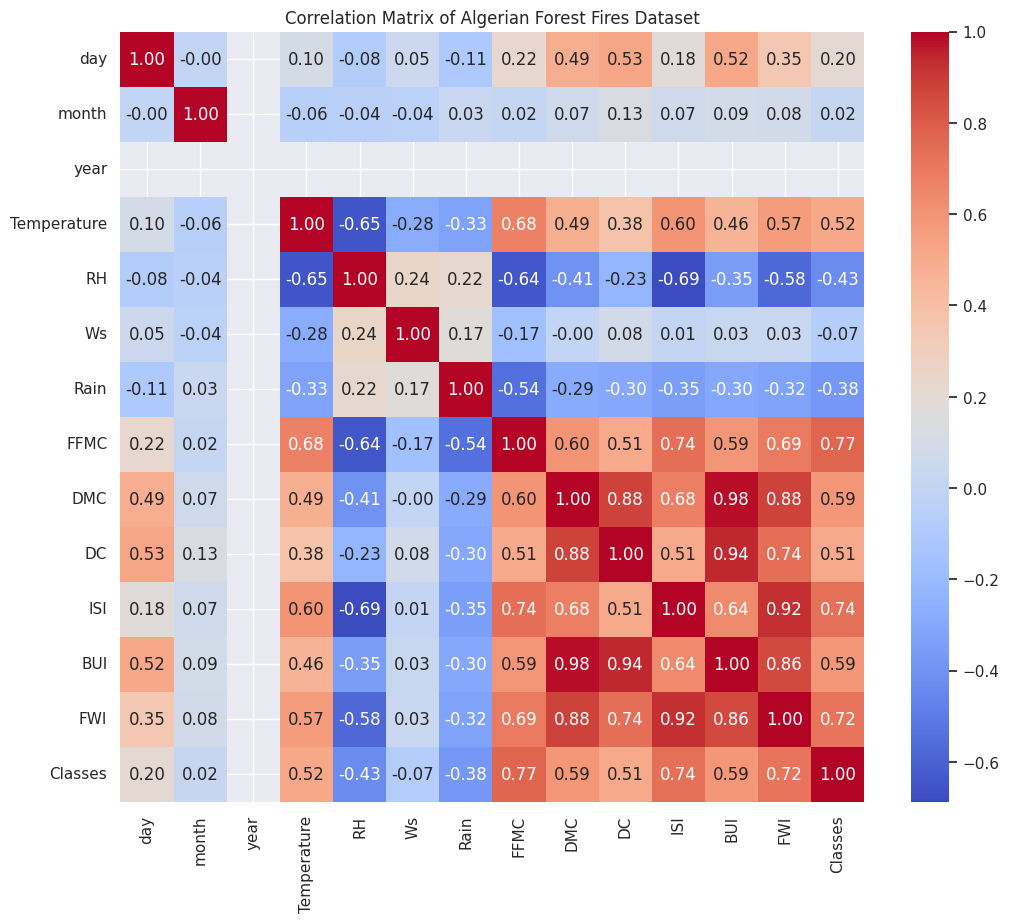

In [69]:
# Create correlation matrix
corr = aff1.corr()

# Display correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix of Algerian Forest Fires Dataset")
plt.show()

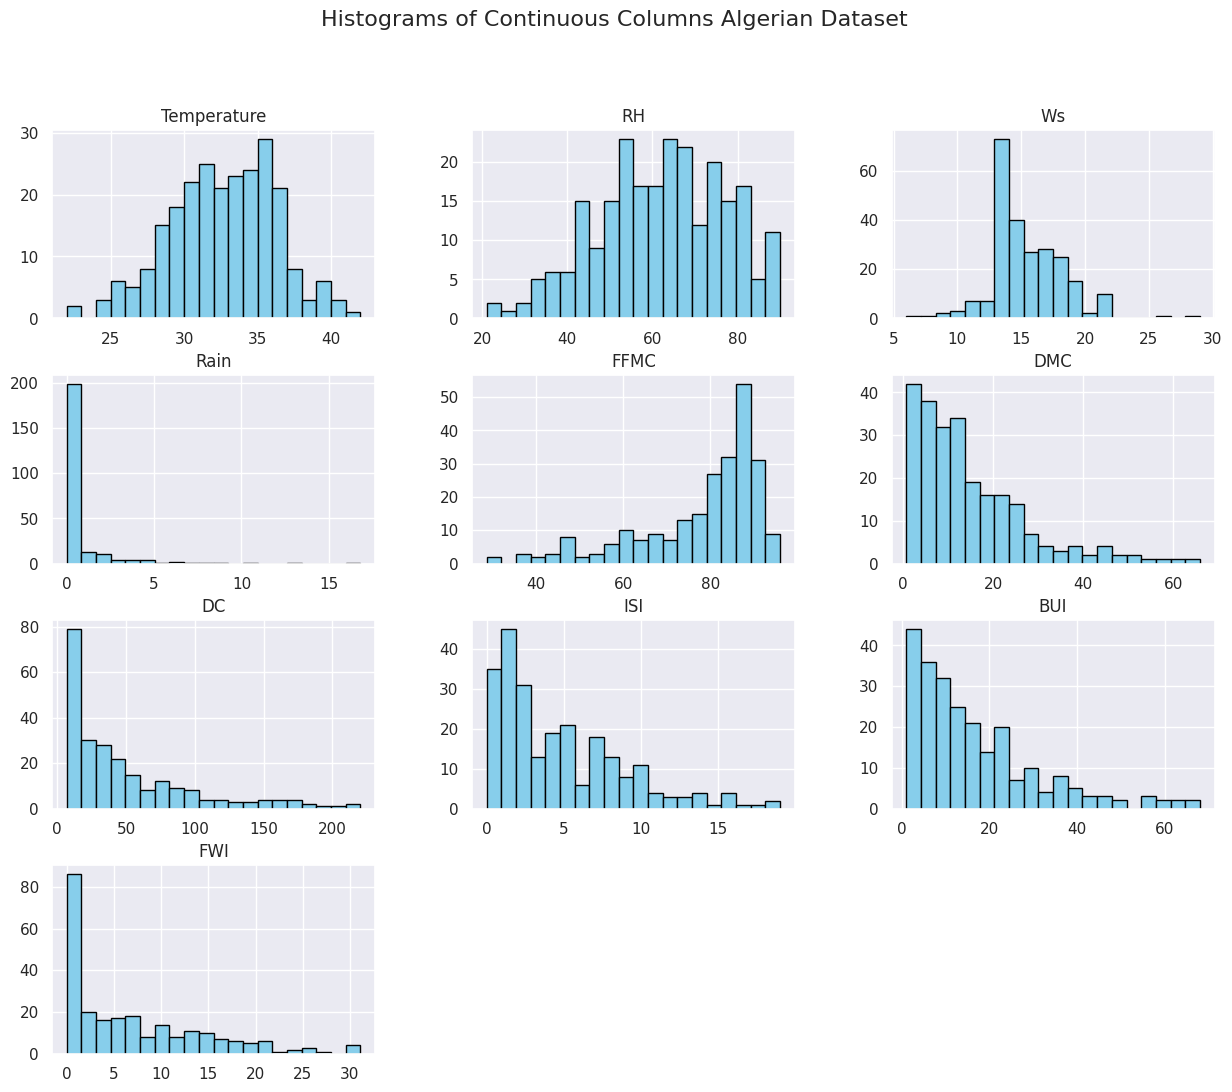

In [70]:
continuous_cols = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

# Plot histograms
aff1[continuous_cols].hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Continuous Columns Algerian Dataset", fontsize=16)
plt.show()

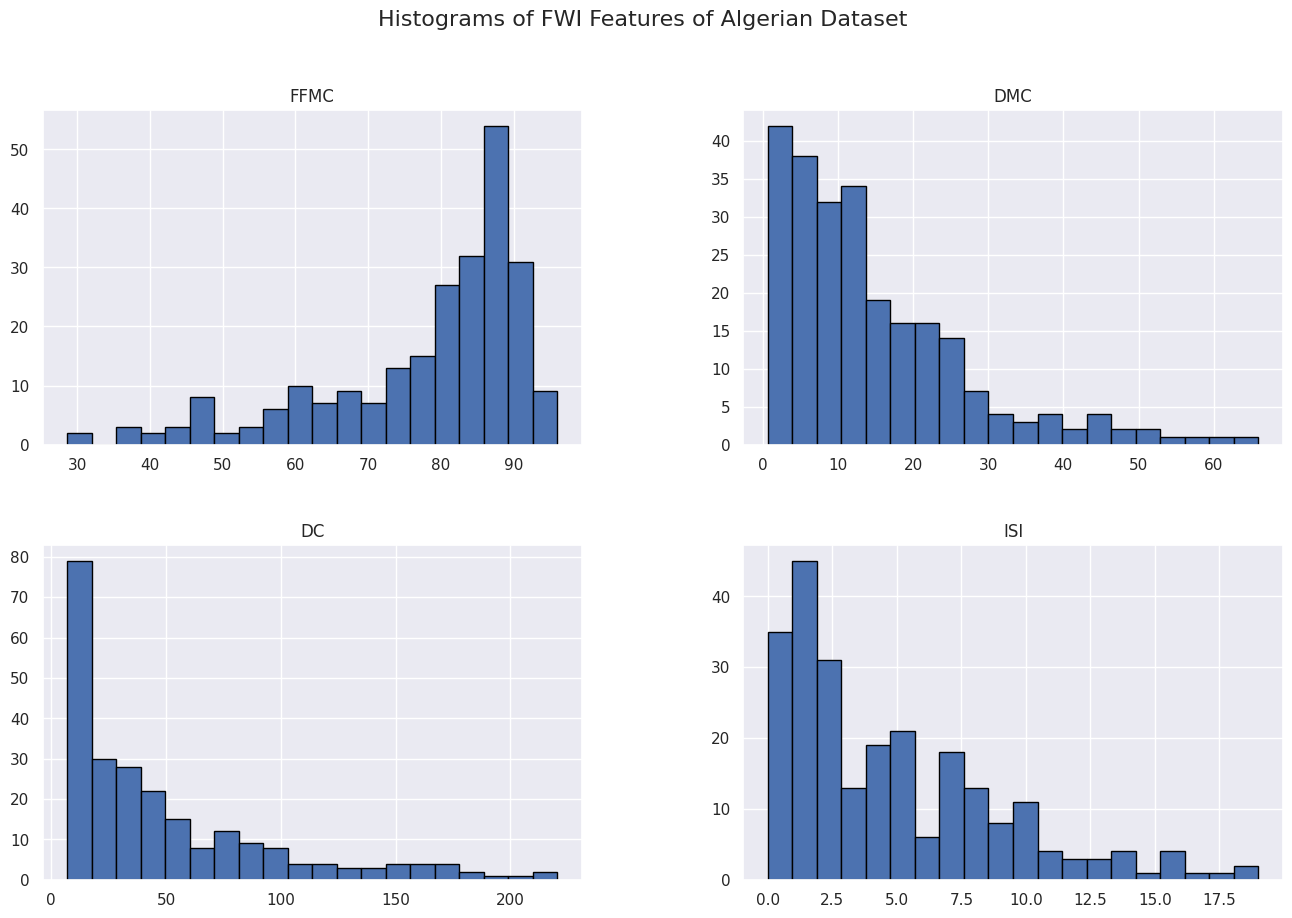

In [71]:
fwi_cols = ['FFMC', 'DMC', 'DC', 'ISI']

# Plot histograms
aff1[fwi_cols].hist(bins=20, figsize=(16,10), edgecolor='black')
plt.suptitle("Histograms of FWI Features of Algerian Dataset", fontsize=16)
plt.show()

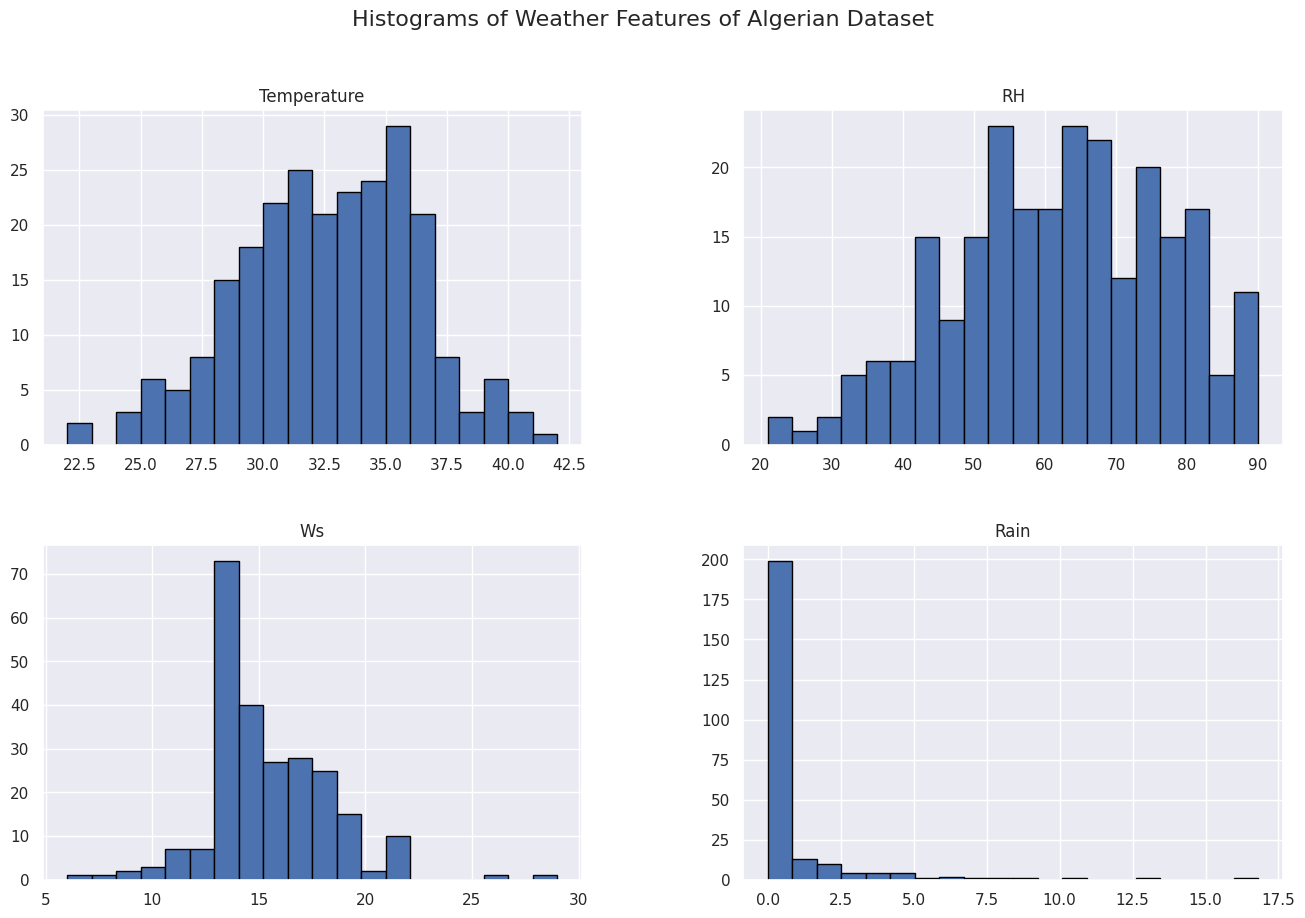

In [72]:
weather_cols = ['Temperature', 'RH', 'Ws', 'Rain']

# Plot histograms
aff1[weather_cols].hist(bins=20, figsize=(16,10), edgecolor='black')
plt.suptitle("Histograms of Weather Features of Algerian Dataset", fontsize=16)
plt.show()

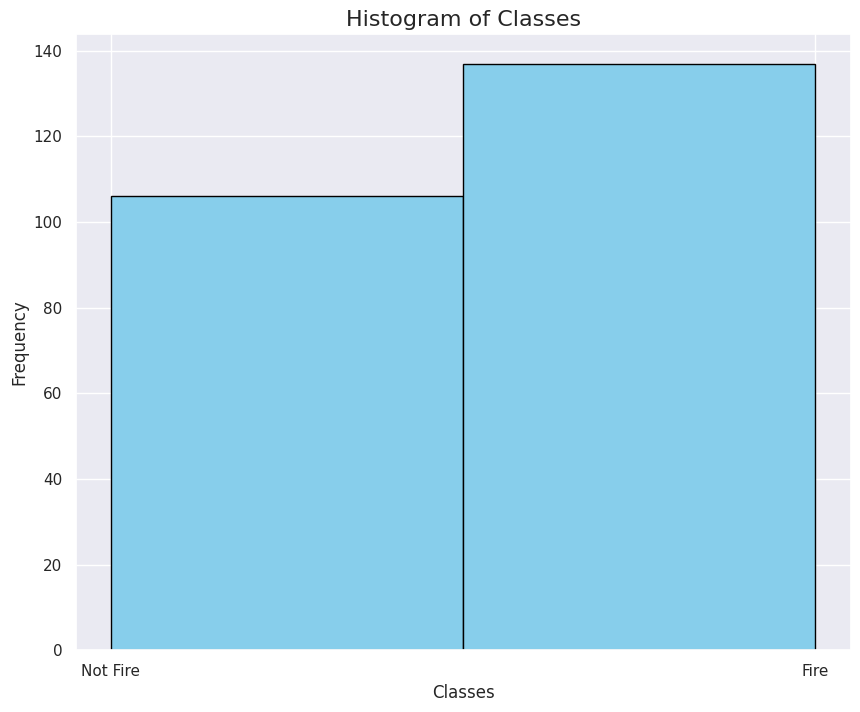

In [73]:
plt.figure(figsize=(10,8))
plt.hist(aff1['Classes'], bins=2, edgecolor='black', color='Skyblue')
plt.xticks([0,1], ['Not Fire', 'Fire'])
plt.title("Histogram of Classes", fontsize=16)
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

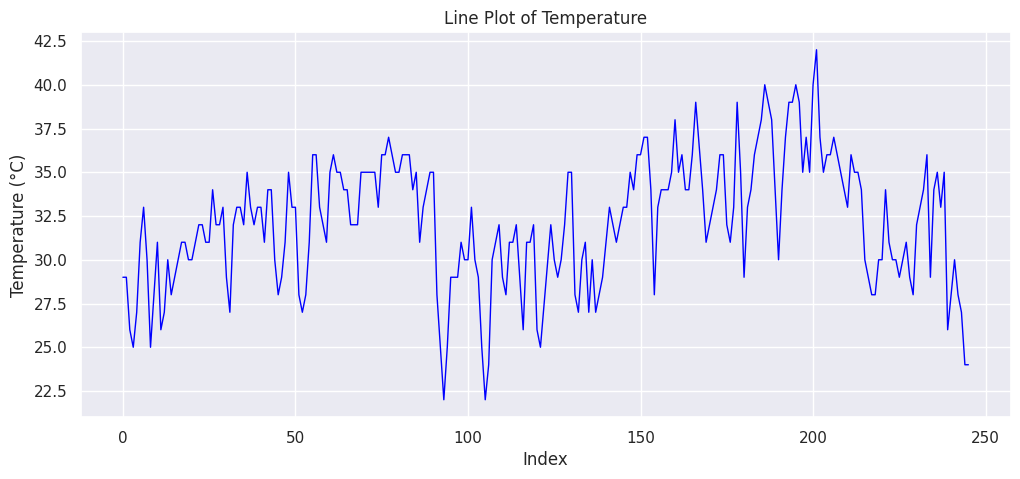

In [74]:
plt.figure(figsize=(12,5))
plt.plot(aff1['Temperature'], color='blue', linewidth=1)
plt.title("Line Plot of Temperature")
plt.xlabel("Index")
plt.ylabel("Temperature (°C)")
plt.show()

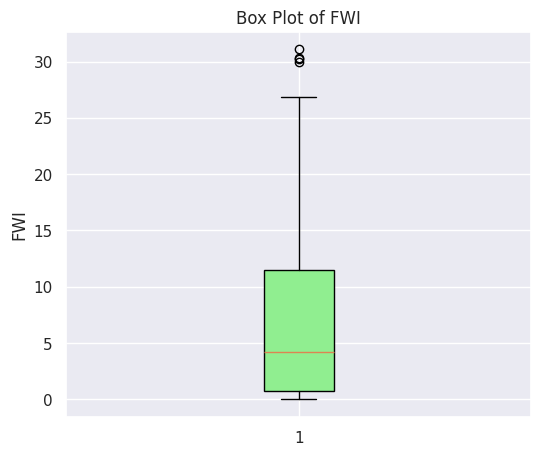

In [75]:
plt.figure(figsize=(6,5))
plt.boxplot(aff1['FWI'], patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Box Plot of FWI")
plt.ylabel("FWI")
plt.show()

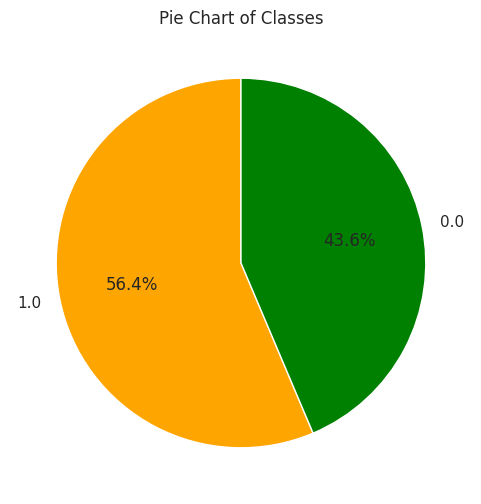

In [76]:
class_counts = aff1['Classes'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['orange','green'], startangle=90)
plt.title("Pie Chart of Classes")
plt.show()

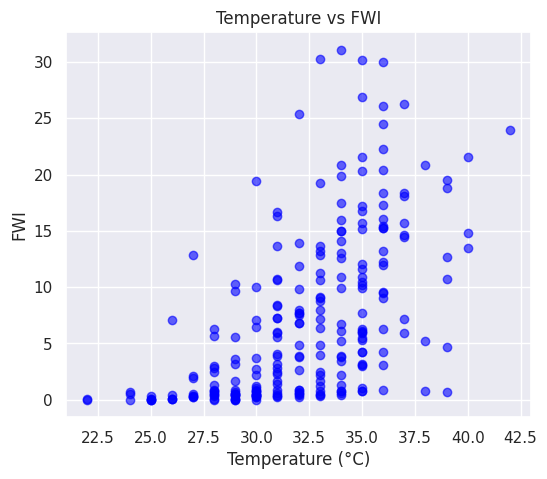

In [77]:
plt.figure(figsize=(6,5))
plt.scatter(aff1['Temperature'], aff1['FWI'], color='blue', alpha=0.6)
plt.title("Temperature vs FWI")
plt.xlabel("Temperature (°C)")
plt.ylabel("FWI")
plt.show()

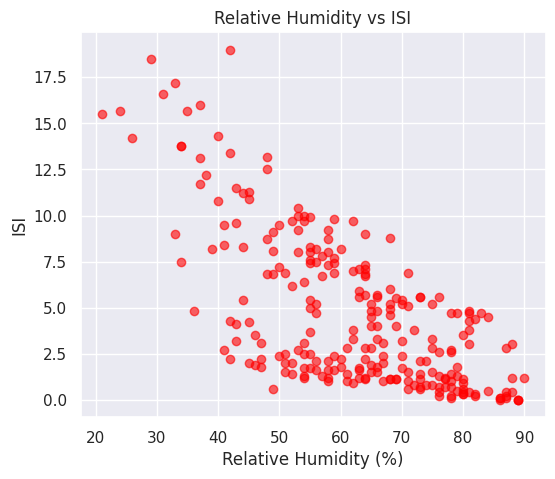

In [78]:
plt.figure(figsize=(6,5))
plt.scatter(aff1['RH'], aff1['ISI'], color='red', alpha=0.6)
plt.title("Relative Humidity vs ISI")
plt.xlabel("Relative Humidity (%)")
plt.ylabel("ISI")
plt.show()

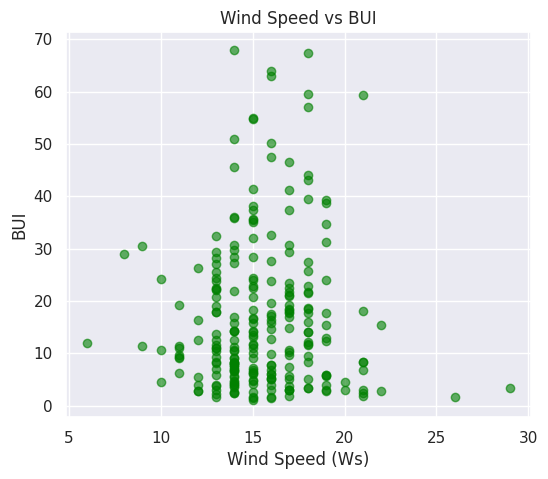

In [79]:
plt.figure(figsize=(6,5))
plt.scatter(aff1['Ws'], aff1['BUI'], color='green', alpha=0.6)
plt.title("Wind Speed vs BUI")
plt.xlabel("Wind Speed (Ws)")
plt.ylabel("BUI")
plt.show()


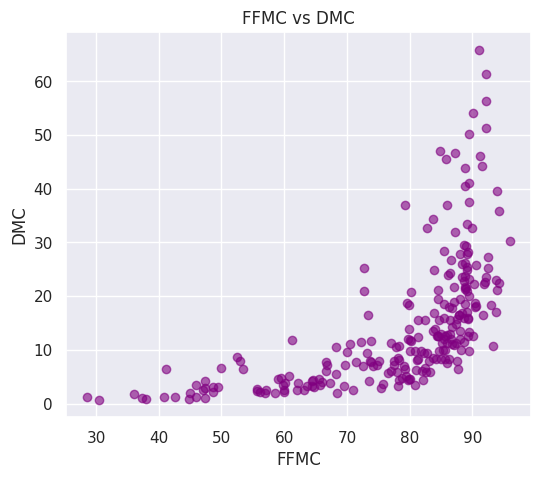

In [80]:
plt.figure(figsize=(6,5))
plt.scatter(aff1['FFMC'], aff1['DMC'], color='purple', alpha=0.6)
plt.title("FFMC vs DMC")
plt.xlabel("FFMC")
plt.ylabel("DMC")
plt.show()

Linear Regression

In [81]:
# Here we predict FWI as an example
X = aff1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]
y = aff1['FWI']

In [82]:
# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [84]:
# predictions
y_pred = lr_model.predict(X_test)

In [85]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
R² Score: 0.99


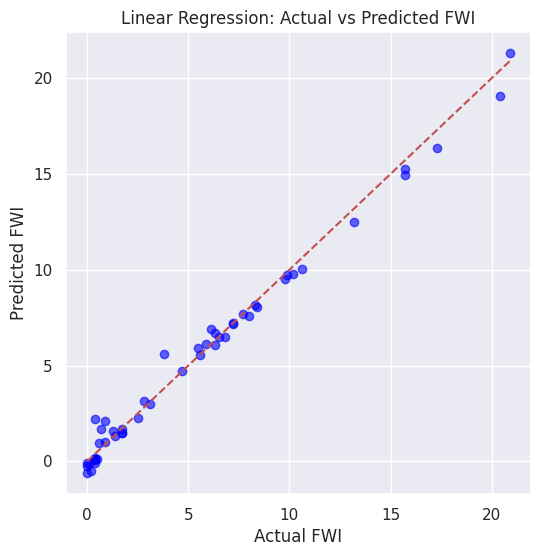

In [86]:
# Scatter plot: Actual vs Predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel("Actual FWI")
plt.ylabel("Predicted FWI")
plt.title("Linear Regression: Actual vs Predicted FWI")
plt.show()

Logistic Regression:

In [88]:
# 1️⃣ Define features and target
X = aff1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = aff1['Classes']  # 0 = Not Fire, 1 = Fire

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [90]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [92]:
#predictions
y_pred = log_model.predict(X_test)


In [93]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.98


In [95]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[21  1]
 [ 0 27]]


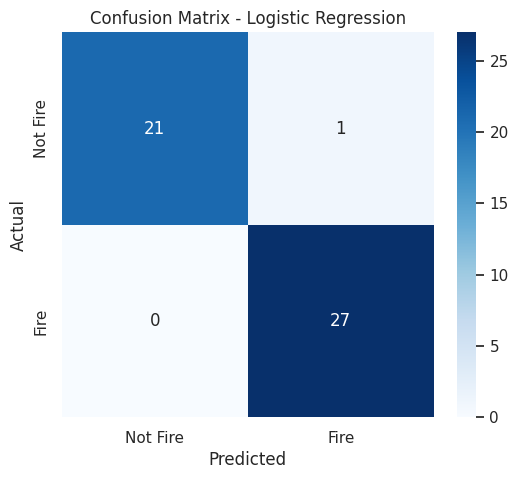

In [96]:
# Visualize confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Fire','Fire'], yticklabels=['Not Fire','Fire'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
#Define features and target
X = aff1[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = aff1['Classes']  # 0 = Not Fire, 1 = Fire

In [103]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Create and train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [104]:
# 4️⃣ Make predictions
y_pred = dt_model.predict(X_test)

# 5️⃣ Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.98


In [105]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



Confusion Matrix:
[[21  1]
 [ 0 27]]


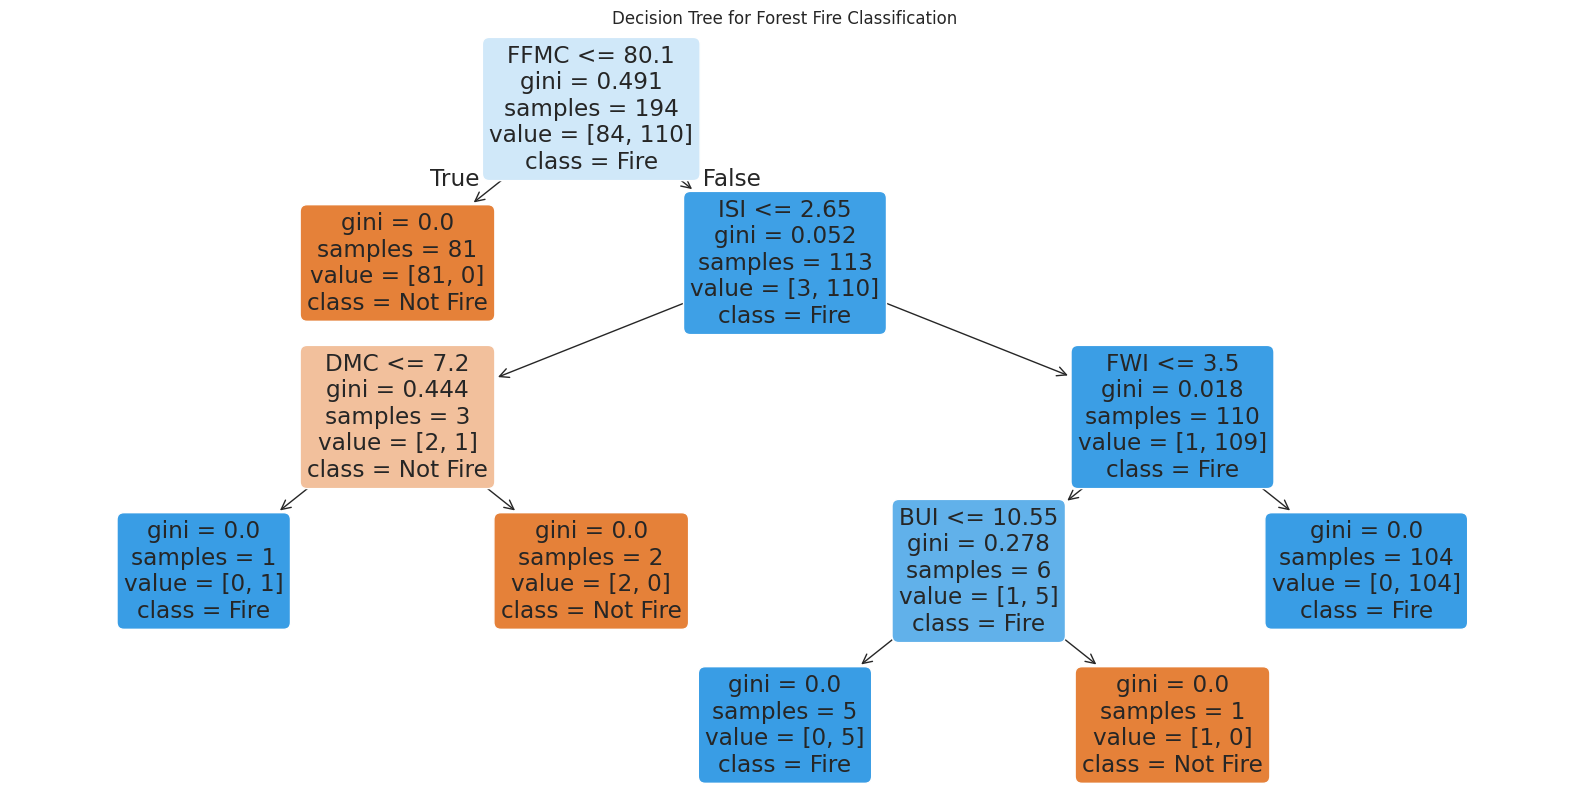

In [108]:
# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Not Fire','Fire'], filled=True, rounded=True)
plt.title("Decision Tree for Forest Fire Classification")
plt.show()